# Generating an Example Classification Data Set
*Paulo G. Martinez* Tue. Jun. 2nd, 2020

In this notebook I'll be doing two things:

## 1. Short exploration of sci-kit learn's `make_classification` function
Which, generates "synthetic" data sets suitable to classification problems 

## 2. Generating an example of classifiable web-session data
Where we could analyze some typical features of a user's session on a website to predict what page they are ultimately looking for.

Let's start by importing the software packages I'll be using in the rest of the notebook

In [1]:
# for plotting
import matplotlib.pyplot as plt
# for numerical transformations
import numpy as np
# for data frame (i.e. table) manipulations
import pandas as pd
# to easily generate a data set with a classification signal in it
from sklearn.datasets import make_classification

## 1. Short exploration of sci-kit learn's [make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) function
Many classification problems can be thought of as analyzing the values in a data record to determine if the record is in "this or that cluster." Here is an example where each record simply has a horizontal and vertical coordiante value and a label indicating what class it belongs to. 

In [2]:
# assign the two outputs of make_classification() to X (the data features) and y (the target)
X,y = make_classification(
    # declare the number of rows/records/samples we want to generate
    n_samples = 1000,
    # declare the number of features/columns we want to generate; in this case 2, the horizontal and vertical coordinates.
    n_features = 2,
    # declare the number of "repetitive" features
    n_redundant = 0,
    # declare the number of "useful" features
    n_informative = 2,
    # set the random seed value so we can reproduce our results in the future, if so desired
    random_state = 8,
    # declare the number of classes to gennerate
    n_classes = 2,
    # declare the number of clusters of each class
    n_clusters_per_class = 2,
)

In [3]:
# X is now an array of 1,000 elements each is a "record" with two "features" the horizontal and vertical coordiante values
print(X[0:5])

[[-1.0683509  -1.43021837]
 [-0.9700986  -0.73895992]
 [-1.04143943 -1.34103546]
 [ 0.53990257  0.52991257]
 [ 0.09476661 -1.47391848]]


In [4]:
# and y also has 1,000 elemebts; each record is merely the number of the classes 0 or 1
y[:5]

array([0, 0, 0, 0, 1])

In [5]:
# We can put the values in X and y into a data frame
toy_df = pd.DataFrame(
   data =  {
       # index into the first element of every record
       'horizontal_coordinate': X[:,0],
        # index into the second element of every record
       'vertical_coordinate': X[:,1],
       # assign
       'TARGET_CLASS':y
   }
)
# display the toy data set
toy_df.head()

,horizontal_coordinate,vertical_coordinate,TARGET_CLASS
0,-1.068351,-1.430218,0
1,-0.970099,-0.738960,0
2,-1.041439,-1.341035,0
3,0.539903,0.529913,0
4,0.094767,-1.473918,1


### Plotting this example gives us an intuitive sense of how classes can be analyzed as clusters in n-dimensional space
In this case, we only used two dimensions.

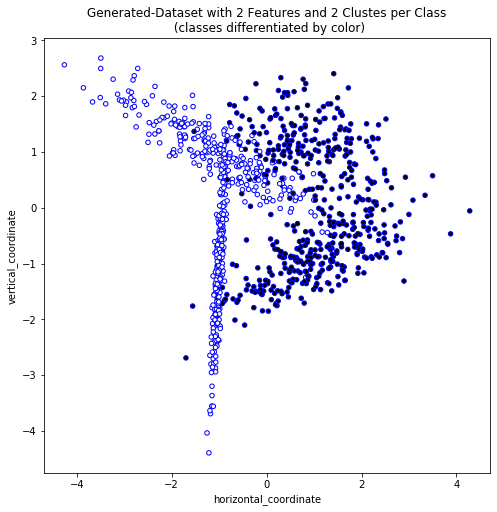

In [6]:
# use the .plot.scatter() method of the data frame object
toy_df.plot.scatter(
    x = 'horizontal_coordinate',
    y = 'vertical_coordinate',
    # set marker colors by values in this column
    c = 'TARGET_CLASS',
    # give each marker a black outline
    edgecolors = 'blue',
    # don't display a colorbar
    colorbar = False,
    # set the size of the plot's figure
    figsize = (8,8),
    title = 'Generated-Dataset with 2 Features and 2 Clustes per Class\n (classes differentiated by color)'
)
plt.show()

## 2. Generating an example of classifiable web-session data
In the real world, we often have much more than 2 features and sometimes the "clusters" can only be properly deterimined when using more than 2 dimensions which means we can't rely on visually intuitive 2-d plots. 

**Let's generate a simplified example of a user's session on a simplified website**
- we'll only "track" the hour and weekday the session began,
- whether they accessed from a Chrome or Firefox browser,
- if the first and second pages they visited were the "FAQ" or "Search" page
- and whether they downloaded one of three possible files on the site

In [7]:
# initialize an empty data frame
web_sesh_df = pd.DataFrame(
    # declare the column headers with empty columns for now
    data = {
        # hour of day (0-24) as float
        'start_hour':[],
        # weekday (0-7) treat as int
        'weekday':[],
        # boolean indicator of whether or not the session is on a chrome browser
        'chrome_browser':[],
        # boolean indicator of whether or not the session is on a firefox browser
        'firefox_browser':[],
        # boolean indicator of whether or not the 1st page visited was
        '1st_page_search':[],
        # boolean indicator of whether or not the 1st page visited was
        '1st_page_faq':[],
        # boolean indicator of whether or not the 1st page visited was
        '2nd_page_search':[],
        # boolean indicator of whether or not the 1st page visited was
        '2nd_page_faq':[],
        # categorical columnn of which file they downnloaded 0,1, or 2
        'TARGET_DOWNLOAD':[]
        
    }
)

# Generate some data to put into the data frame
X,y = make_classification(
    # declare the number of rows to use
    n_samples = 1000,
    # set the number of features to the width of the data minus the target column
    n_features = web_sesh_df.shape[1] - 1,
    # let's assume all the columns are informative except for the two browser features
    n_informative = 6,
    # declare number of target classes to predict (keep it simple at 3)
    n_classes = 3,
    # declare the number of clusters per class
    n_clusters_per_class = 1,
    # declare how easty to make the classification task (larger is easier default is 1.0)
    class_sep = 1.5,
    # set random seed for reproducibility
    random_state = 1
)

# unpack each column in X into columns of a data frame
for i in range(X.shape[1]):
    # get the corresponding column in the data frame
    col = web_sesh_df.columns[i]
    # assign the column in X to the column in the df
    web_sesh_df[col] = X[:,i]

# assign the target column
web_sesh_df['TARGET_DOWNLOAD'] = y
    
# take a look at the data now
web_sesh_df.head()

,start_hour,weekday,chrome_browser,firefox_browser,1st_page_search,1st_page_faq,2nd_page_search,2nd_page_faq,TARGET_DOWNLOAD
0,-1.063950,0.182565,-2.941075,-0.329293,-1.260177,0.440198,2.038754,-1.827899,0
1,-1.484310,1.312075,-1.412113,-1.026644,-0.470754,-1.881764,0.989940,-2.645217,0
2,-1.608478,3.048350,0.832231,1.657103,0.191061,-3.174086,-1.068688,-0.817976,2
3,-0.351239,1.213393,-1.656217,-2.191887,-2.312974,-0.394407,1.091784,-4.255220,0
4,-0.455716,2.586418,2.287171,0.170551,-1.330355,-2.919146,-0.684298,-2.951952,2


notice that `make_classification` just gave me some numerical features, but I want to 
### "massage" those numbers into something that will be easy to understand and makes sense for the columnn headers
For example, I'll start by "rescaling" the values in `start_hour` into a 24 hour scale

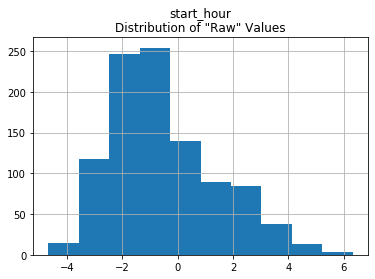

In [8]:
# take a look at its current distribution
web_sesh_df['start_hour'].hist()
plt.title('start_hour\nDistribution of "Raw" Values')
plt.show()

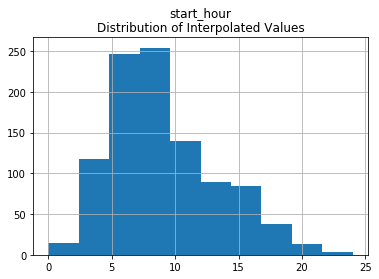

In [9]:
# use numpy to interpolate those values into a declared range
web_sesh_df['start_hour'] = np.interp(
        # the array of values to interpolate
        x = web_sesh_df['start_hour'],
        # the min and max of the existing range
        xp = (web_sesh_df['start_hour'].min(), web_sesh_df['start_hour'].max()),
        # the min and max of the new range
        fp = (0,24),
    )

# display the output as a spot check
web_sesh_df['start_hour'].hist()
plt.title('start_hour\nDistribution of Interpolated Values')
plt.show()

# round it a bit for ease of interpretation
web_sesh_df['start_hour'] = np.round(web_sesh_df['start_hour'], 1)

**interpolate weekday to values from 1-7** I'll skip the plotting this time

In [10]:
# interpolate the values as floats
web_sesh_df['weekday'] = np.interp(
        # the array of values to interpolate
        x = web_sesh_df.weekday,
        # the min and max of the existing range
        xp = (web_sesh_df.weekday.min(), web_sesh_df.weekday.max()),
        # the min and max of the new range
        fp = (1,7),
    )
# convert the values to ints
web_sesh_df['weekday'] = web_sesh_df['weekday'].astype(int)

**interpolate the remaining features as booleans**
- I think it will be fine since I'm just taking a continuous feature and basically drawing a line in the middle and makign it binary

In [11]:
# iterate throug the columns I want to interpolate to booleans
for col in [
    'chrome_browser', 'firefox_browser', 
    '1st_page_search', '1st_page_faq', 
    '2nd_page_search', '2nd_page_faq'
]:
    # transform them to the boolean series
    web_sesh_df[col] = web_sesh_df[col] >= web_sesh_df[col].median()
# and display 10 rows
web_sesh_df.head(10)

,start_hour,weekday,chrome_browser,firefox_browser,1st_page_search,1st_page_faq,2nd_page_search,2nd_page_faq,TARGET_DOWNLOAD
0,7.9,3,False,False,False,True,True,False,0
1,6.9,4,False,False,True,False,True,False,0
2,6.7,5,True,True,True,False,False,False,2
3,9.4,4,False,False,False,True,True,False,0
4,9.2,5,True,False,False,False,False,False,2
5,8.2,4,False,False,False,True,True,False,0
6,14.9,2,True,True,True,True,False,True,1
7,14.8,2,True,True,True,True,False,True,1
8,6.9,4,False,True,False,True,False,True,2
9,7.0,3,True,True,True,False,False,True,1


# And we're done. Next up: model the data